In [1]:
import tensorflow as tf

In [4]:
new_model = tf.keras.models.load_model('Unet_model.keras')
# Show the model architecture
new_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 64)      │           1,792 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 128, 128, 64)      │          36,928 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64, 64, 64)        │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 64, 64, 128)       │          73,856 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 64, 64, 128)       │         147,584 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 32, 32, 128)       │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 32, 32, 128)       │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 256)       │         295,168 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 256)       │         590,080 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 16, 16, 256)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 16, 16, 256)       │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 16, 16, 512)       │       1,180,160 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 16, 16, 512)       │       2,359,808 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 8, 8, 512)         │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │               

 Total params: 103,540,427 (394.98 MB)

 Trainable params: 34,513,475 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,026,952 (263.32 MB)

In [5]:
import os

In [22]:
# Define image directory
image_directory = "../Unet/"

# Get only files from the image directory
image_file_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, filename))]

In [23]:
print(image_file_paths)

['../Unet/1080.png', '../Unet/MV_6_4_2024.ipynb', '../Unet/Unet_model.keras']


In [8]:
import matplotlib.pyplot as plt

In [9]:
# Define preprocessing functions
def resize(input_image):
    input_image = tf.image.resize(input_image, (128, 128), method="nearest")
    input_image.set_shape([128, 128, 3])  # Explicitly set the shape
    return input_image

def enhance_contrast(input_image):
    enhanced_image = tf.image.per_image_standardization(input_image)
    return enhanced_image

def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image

def load_image_and_preprocess(image_path):
    input_image = tf.io.read_file(image_path)
    input_image = tf.image.decode_png(input_image, channels=3)
    input_image = resize(input_image)
    input_image = enhance_contrast(input_image)
    input_image = normalize(input_image)
    return input_image

def display_2(display_list):
    plt.figure(figsize=(8, 10))
    title = ["Input Image","Predicted_Mask"]
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap = 'gray')
        plt.axis("off")
    plt.show()

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
  if dataset:
    for image in dataset.take(num):
      pred_mask = new_model.predict(image)
      display_2([image[0], create_mask(pred_mask)])


<_ParallelMapDataset element_spec=TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)>
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


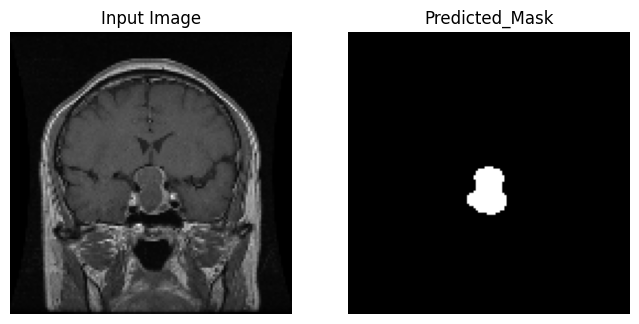

In [24]:
# Create a TensorFlow dataset from the list of file paths
image_dataset = tf.data.Dataset.from_tensor_slices(image_file_paths)

# Map the loading and preprocessing function to the dataset
image_dataset = image_dataset.map(load_image_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
print(image_dataset)
test_batches = image_dataset.take(1).batch(1)

# Now, you can iterate through the dataset and predict
 # Take a single batch for demonstration
show_predictions(test_batches.take(1),1)